In [1]:
# import libraries

import uproot
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# import scikitplot as skplt

import os

In [2]:
# define variables (features)

# discriminating_variables = ["pt", "eta", "phi", "true_E", "Rhad", "Rhad1", 
#                            "Reta", "Rphi", "Eratio", "DeltaE", "wEta1", "wEta2",
#                            "wTotS1"]
discriminating_variables = ["pt", "eta", "true_E", "Rhad", "Rhad1",
                            "Reta", "Rphi", "Eratio", "DeltaE", "f3", "wEta2",
                            "wTotS1", "trk_dEta1", "EoverP",
                            "vtx_dphi", "vtx_deta", "vtx_deltaZ0", 
                            "trk_TRT_PID1", "trk_TRT_PID2"]

# add slso ISO correction
variables = ["eventNumber", "pdgId", "parentPdgId", "isLoose", "isTight", "isIsoWithCorr_Loose" ] + discriminating_variables

In [3]:
# Now read from all the sample files in the directory

# What's the plan:
# 1 - save all file names
# 2 - create a cycle with a temporary data frame
# 3 - add distinctive labels to the data frame and concatenate 
#     with the total data frame (i use pd.concat)

signal_file_names = os.listdir("/storage_tmp/atlas/lnasella/yystar/MergedElectronID"+
                    "/Run3/Ntuples/yys_ME002/signal")

print(signal_file_names)

['mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root', 'mc23a.PhPy8EG_NNPDF23_A14_ggZH125_yys_ME002.root', 'mc23a.PhPy8EG_NNPDF23_A14_ttH125_yys_ME002.root', 'mc23a.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root', 'mc23a.PhPy8EG_NNPDF23_A14_WmH125J_yys_ME002.root', 'mc23a.PhPy8EG_NNPDF23_A14_WpH125J_yys_ME002.root', 'mc23a.PhPy8EG_NNPDF23_A14_ZH125J_yys_ME002.root', 'mc23d.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root', 'mc23d.PhPy8EG_NNPDF23_A14_ggZH125_yys_ME002.root', 'mc23d.PhPy8EG_NNPDF23_A14_ttH125_yys_ME002.root', 'mc23d.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root', 'mc23d.PhPy8EG_NNPDF23_A14_WmH125J_yys_ME002.root', 'mc23d.PhPy8EG_NNPDF23_A14_WpH125J_yys_ME002.root', 'mc23d.PhPy8EG_NNPDF23_A14_ZH125J_yys_ME002.root', 'mc23e.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root', 'mc23e.PhPy8EG_NNPDF23_A14_ggZH125_yys_ME002.root', 'mc23e.PhPy8EG_NNPDF23_A14_ttH125_yys_ME002.root', 'mc23e.PhPy8EG_NNPDF23_A14_WmH125J_yys_ME002.root', 'mc23e.PhPy8EG_NNPDF23_A14_WpH125J_yys_ME002.root', 'mc23e.PhPy8EG_NNPD

In [4]:
# step 2

# define **signal** data frame
# no prior selections!

sd = pd.DataFrame()
count = 0

for file_name in signal_file_names:
    tempf = uproot.open(
        "/storage_tmp/atlas/lnasella/yystar/MergedElectronID"+
        "/Run3/Ntuples/yys_ME002/signal/"+ file_name)
    tempf.keys()
    tempt = tempf["MergedElectron"]
    tempd = tempt.arrays(variables, library="pd")
    
    # step 3
    # lables for signal
    tempd["file_name_label"] = file_name
    tempd["truth_label"] = 1.
    
    # additional labels to distinguish every signal file
    # version of file
    if "mc23a" in file_name:
        tempd["version_label"] = "a"
    elif "mc23d" in file_name:
        tempd["version_label"] = "d"
    else: tempd["version_label"] = "e"
    
    print("File #" + str(count) + ": " + file_name) 
    count += 1
    
    # selection on signal
    # tempd = tempd[ (tempd["true_E"]!=-999) & (tempd["isLoose"]==True)]
    
    # concatenate with sd
    #pd.concat([sd, sd], ignore_index=True)
    sd = pd.concat([sd, tempd], axis=0, ignore_index=True)

print("Signal events:")
sd

File #0: mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root
File #1: mc23a.PhPy8EG_NNPDF23_A14_ggZH125_yys_ME002.root
File #2: mc23a.PhPy8EG_NNPDF23_A14_ttH125_yys_ME002.root
File #3: mc23a.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root
File #4: mc23a.PhPy8EG_NNPDF23_A14_WmH125J_yys_ME002.root
File #5: mc23a.PhPy8EG_NNPDF23_A14_WpH125J_yys_ME002.root
File #6: mc23a.PhPy8EG_NNPDF23_A14_ZH125J_yys_ME002.root
File #7: mc23d.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root
File #8: mc23d.PhPy8EG_NNPDF23_A14_ggZH125_yys_ME002.root
File #9: mc23d.PhPy8EG_NNPDF23_A14_ttH125_yys_ME002.root
File #10: mc23d.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root
File #11: mc23d.PhPy8EG_NNPDF23_A14_WmH125J_yys_ME002.root
File #12: mc23d.PhPy8EG_NNPDF23_A14_WpH125J_yys_ME002.root
File #13: mc23d.PhPy8EG_NNPDF23_A14_ZH125J_yys_ME002.root
File #14: mc23e.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root
File #15: mc23e.PhPy8EG_NNPDF23_A14_ggZH125_yys_ME002.root
File #16: mc23e.PhPy8EG_NNPDF23_A14_ttH125_yys_ME002.root
File #17: mc23e

,eventNumber,pdgId,parentPdgId,isLoose,isTight,isIsoWithCorr_Loose,pt,eta,true_E,Rhad,...,trk_dEta1,EoverP,vtx_dphi,vtx_deta,vtx_deltaZ0,trk_TRT_PID1,trk_TRT_PID2,file_name_label,truth_label,version_label
0,216001,-11,22,0,0,1,22.755053,-2.289498,146130.046875,-0.007179,...,0.002138,5.548630,-0.011435,-0.000552,0.114830,-0.000000,-0.000000,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a
1,216035,11,22,1,0,1,90.648857,-0.126479,-999.000000,0.001414,...,0.000310,1.007238,0.004516,-0.001034,161.324081,-0.013623,-0.026559,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a
2,216028,11,11,1,0,1,69.194923,0.243375,69884.984375,-0.000153,...,0.003101,1.181469,0.000508,0.003027,0.189831,-0.027880,-0.006519,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a
3,216004,11,11,0,0,1,23.591095,1.128625,83809.289062,-0.003850,...,-0.001529,0.472209,0.021275,0.000882,0.028795,0.023110,0.096197,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a
4,216005,-11,-11,1,0,1,59.034683,0.146982,66662.125000,-0.005290,...,-0.000149,0.993656,0.002240,-0.008324,0.101280,0.003245,0.103180,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386937,869995,11,22,1,0,1,43.748730,1.992245,-999.000000,0.005533,...,-0.000046,2.554826,-0.006597,-0.000133,37.528984,-0.049290,-0.313752,mc23e.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root,1.0,e
2386938,869962,211,21,0,0,0,29.664747,2.050288,-999.000000,0.030641,...,-0.006547,3.156963,-0.002576,0.015868,0.007011,0.070282,-0.076030,mc23e.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root,1.0,e
2386939,869992,-211,1,0,0,0,51.552727,-0.644728,-999.000000,0.085393,...,-0.001550,1.221653,-0.010733,-0.009579,8.001463,-0.028163,0.008598,mc23e.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root,1.0,e
2386940,869977,211,413,0,0,0,23.493425,-1.155032,-999.000000,0.396828,...,0.020910,1.651285,-0.061262,-0.025502,0.029808,-0.052335,0.065770,mc23e.PhPy8EG_NNPDF23_A14_VBFH125_yys_ME002.root,1.0,e


In [5]:
# read data from background files

bkg_file_names = os.listdir("/storage_tmp/atlas/lnasella/yystar/MergedElectronID"+
                    "/Run3/Ntuples/yys_ME002/bkg")

print(bkg_file_names)

['mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root', 'mc23a.Py8EG_A14NNPDF23LO_perf_JF35.root', 'mc23a.Py8EG_A14NNPDF23LO_perf_JF50.root', 'mc23d.Py8EG_A14NNPDF23LO_perf_JF17.root', 'mc23d.Py8EG_A14NNPDF23LO_perf_JF35.root', 'mc23d.Py8EG_A14NNPDF23LO_perf_JF50.root', 'mc23e.Py8EG_A14NNPDF23LO_perf_JF17.root', 'mc23e.Py8EG_A14NNPDF23LO_perf_JF50.root', 'mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root']


In [6]:
bd = pd.DataFrame()
count = 0

for file_name in bkg_file_names:
    tempf = uproot.open(
        "/storage_tmp/atlas/lnasella/yystar/MergedElectronID"+
        "/Run3/Ntuples/yys_ME002/bkg/"+ file_name)
    tempf.keys()
    tempt = tempf["MergedElectron"]
    tempd = tempt.arrays(variables, library="pd")
    
    # step 3
    # lables for bkg
    tempd["file_name_label"] = file_name
    tempd["truth_label"] = 0.

    # additional labels to distinguish every background file
    # version of file
    if "mc23a" in file_name:
        tempd["version_label"] = "a"
    elif "mc23d" in file_name:
        tempd["version_label"] = "d"
    else: tempd["version_label"] = "e"
    
    # threshold on jet filter
    if "JF17" in file_name:
        tempd["jf_label"] = 17.
    elif "JF35" in file_name:
        tempd["jf_label"] = 35.
    else: tempd["jf_label"] = 50.
    
    print("File #" + str(count) + ": " + file_name) 
    count += 1
    
    # concatenate with bd
    #pd.concat([bd, sd], ignore_index=True)
    bd = pd.concat([bd, tempd], axis=0, ignore_index=True)

print("Total events:")
bd

File #0: mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root
File #1: mc23a.Py8EG_A14NNPDF23LO_perf_JF35.root
File #2: mc23a.Py8EG_A14NNPDF23LO_perf_JF50.root
File #3: mc23d.Py8EG_A14NNPDF23LO_perf_JF17.root
File #4: mc23d.Py8EG_A14NNPDF23LO_perf_JF35.root
File #5: mc23d.Py8EG_A14NNPDF23LO_perf_JF50.root
File #6: mc23e.Py8EG_A14NNPDF23LO_perf_JF17.root
File #7: mc23e.Py8EG_A14NNPDF23LO_perf_JF50.root
File #8: mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root
Total events:


,eventNumber,pdgId,parentPdgId,isLoose,isTight,isIsoWithCorr_Loose,pt,eta,true_E,Rhad,...,EoverP,vtx_dphi,vtx_deta,vtx_deltaZ0,trk_TRT_PID1,trk_TRT_PID2,file_name_label,truth_label,version_label,jf_label
0,16692166,22,111,0,0,1,28.396830,-0.749064,-999.0,0.033459,...,7.632531,0.031880,0.007396,26.832861,-0.031250,-0.002518,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
1,17320220,211,323,0,0,0,22.957937,-0.830603,-999.0,0.129243,...,1.388864,0.001829,0.020290,0.137325,0.046606,0.035249,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
2,17320174,321,-3,0,0,0,35.301811,-0.653258,-999.0,0.270078,...,0.951316,-0.003385,-0.012352,0.031330,-0.100522,-0.062189,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
3,17320174,-2212,-3,0,0,0,21.667419,-1.338072,-999.0,0.430156,...,-44.181122,-999.000000,-999.000000,77.586304,-0.166470,-0.261547,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
4,17320520,0,0,0,0,0,22.373116,0.006884,-999.0,-0.008694,...,2.922393,-0.078821,0.021778,20.072994,-0.016856,-0.005807,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761861,234011663,211,113,0,0,0,36.597904,-1.521753,-999.0,0.522742,...,0.912994,0.021768,0.013834,0.178782,0.062064,-0.074665,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761862,234011663,-211,21,0,0,0,34.479755,-1.626309,-999.0,0.401765,...,1.215633,-0.032453,-0.018369,0.032670,0.139856,-0.227623,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761863,234011663,-321,-313,0,0,0,20.201946,-0.711831,-999.0,0.335048,...,1.131564,-0.007000,0.015375,0.243883,0.043937,-0.029641,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761864,234007958,211,-3,0,0,1,33.329578,-2.390301,-999.0,0.017678,...,10.989674,0.040467,-0.023224,18.897497,-0.000000,-0.000000,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0


In [7]:
# **series of selections on signal**

# get total count of signal event
count_sd = np.array(sd.shape[0])
count_sd

array(2386942)

In [8]:
# reject events with true_E = -999
# this means that they are not merged electrons from y*

sd_ny = sd[ sd["true_E"]==-999 ] 
sd = sd[ sd["true_E"]!=-999 ]
count_sd = np.append(count_sd, sd.shape[0])

print("*Cut on true_E selection*\n")
print("Total number of events (signal): " + str(count_sd[0]))
print("Number of events after cut: " + str(count_sd[-1]))
print("Absolute efficiency: " + str(count_sd[-1] / count_sd[0]) )
print("Relative efficiency: " + str(count_sd[-1] / count_sd[-2]) )

*Cut on true_E selection*

Total number of events (signal): 2386942
Number of events after cut: 1240060
Absolute efficiency: 0.5195182790365246
Relative efficiency: 0.5195182790365246


In [9]:
# isLoose = true

sd = sd[ sd["isLoose"] == True ]
count_sd = np.append(count_sd, sd.shape[0])
count_sd

array([2386942, 1240060,  825402])

In [10]:
print("*Cut on isLoose selection*\n")
print("Total number of events (signal): " + str(count_sd[0]))
print("Number of events after cut: " + str(count_sd[-1]))
print("Absolute efficiency: " + str(count_sd[-1] / count_sd[0]) )
print("Relative efficiency: " + str(count_sd[-1] / count_sd[-2]) )

*Cut on isLoose selection*

Total number of events (signal): 2386942
Number of events after cut: 825402
Absolute efficiency: 0.3457989343687446
Relative efficiency: 0.6656145670370789


In [11]:
# selection on isIsoWithCorr_Loose == true

sd = sd[ sd["isIsoWithCorr_Loose"]==True] 
count_sd = np.append(count_sd, sd.shape[0])

count_sd

array([2386942, 1240060,  825402,  811432])

In [12]:
print("*Cut on ISO Loose selection*\n")
print("Total number of events (signal): " + str(count_sd[0]))
print("Number of events after cut: " + str(count_sd[-1]))
print("Absolute efficiency: " + str(count_sd[-1] / count_sd[0]) )
print("Relative efficiency: " + str(count_sd[-1] / count_sd[-2]) )

*Cut on ISO Loose selection*

Total number of events (signal): 2386942
Number of events after cut: 811432
Absolute efficiency: 0.33994625759653985
Relative efficiency: 0.9830749137995789


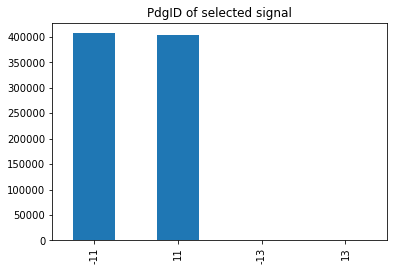

In [13]:
# study particle IDs

ax = sd["pdgId"].value_counts().plot(kind='bar',
                                    title = "PdgID of selected signal")

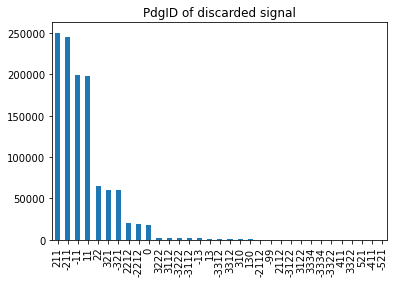

In [14]:
ax = sd_ny["pdgId"].value_counts().plot(kind='bar',
                                    title = "PdgID of discarded signal")

In [15]:
print("Discarded signal on true_E")

count_sd_ny = np.array(sd_ny.shape[0])
count_sd_ny

Discarded signal on true_E


array(1146882)

In [16]:
sd_ny = sd_ny[ sd_ny["isLoose"]==True ]
count_sd_ny = np.append(count_sd_ny, sd.shape[0])

print("*Cut on true_E selection*\n")
print("Total number of events (discarded signal on true_E): " + str(count_sd_ny[0]))
print("Number of events after cut: " + str(count_sd_ny[-1]))
print("Absolute efficiency: " + str(count_sd_ny[-1] / count_sd_ny[0]) )
print("Relative efficiency: " + str(count_sd_ny[-1] / count_sd_ny[-2]) )

*Cut on true_E selection*

Total number of events (discarded signal on true_E): 1146882
Number of events after cut: 811432
Absolute efficiency: 0.7075113220017404
Relative efficiency: 0.7075113220017404


In [17]:
sd_ny = sd_ny[ sd_ny["isIsoWithCorr_Loose"]==True ]
count_sd_ny = np.append(count_sd_ny, sd.shape[0])

print("*Cut on ISO Loose selection*\n")
print("Total number of events (discarded signal on true_E): " + str(count_sd_ny[0]))
print("Number of events after cut: " + str(count_sd_ny[-1]))
print("Absolute efficiency: " + str(count_sd_ny[-1] / count_sd_ny[0]) )
print("Relative efficiency: " + str(count_sd_ny[-1] / count_sd_ny[-2]) )

*Cut on ISO Loose selection*

Total number of events (discarded signal on true_E): 1146882
Number of events after cut: 811432
Absolute efficiency: 0.7075113220017404
Relative efficiency: 1.0


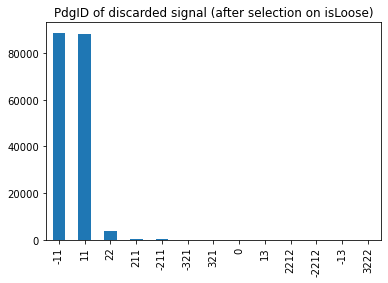

In [18]:
ax = sd_ny["pdgId"].value_counts().plot(kind='bar',
                                    title = "PdgID of discarded signal (after selection on isLoose)")

In [19]:
# selections on background

count_bd = np.array(bd.shape[0])
bd

,eventNumber,pdgId,parentPdgId,isLoose,isTight,isIsoWithCorr_Loose,pt,eta,true_E,Rhad,...,EoverP,vtx_dphi,vtx_deta,vtx_deltaZ0,trk_TRT_PID1,trk_TRT_PID2,file_name_label,truth_label,version_label,jf_label
0,16692166,22,111,0,0,1,28.396830,-0.749064,-999.0,0.033459,...,7.632531,0.031880,0.007396,26.832861,-0.031250,-0.002518,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
1,17320220,211,323,0,0,0,22.957937,-0.830603,-999.0,0.129243,...,1.388864,0.001829,0.020290,0.137325,0.046606,0.035249,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
2,17320174,321,-3,0,0,0,35.301811,-0.653258,-999.0,0.270078,...,0.951316,-0.003385,-0.012352,0.031330,-0.100522,-0.062189,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
3,17320174,-2212,-3,0,0,0,21.667419,-1.338072,-999.0,0.430156,...,-44.181122,-999.000000,-999.000000,77.586304,-0.166470,-0.261547,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
4,17320520,0,0,0,0,0,22.373116,0.006884,-999.0,-0.008694,...,2.922393,-0.078821,0.021778,20.072994,-0.016856,-0.005807,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761861,234011663,211,113,0,0,0,36.597904,-1.521753,-999.0,0.522742,...,0.912994,0.021768,0.013834,0.178782,0.062064,-0.074665,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761862,234011663,-211,21,0,0,0,34.479755,-1.626309,-999.0,0.401765,...,1.215633,-0.032453,-0.018369,0.032670,0.139856,-0.227623,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761863,234011663,-321,-313,0,0,0,20.201946,-0.711831,-999.0,0.335048,...,1.131564,-0.007000,0.015375,0.243883,0.043937,-0.029641,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761864,234007958,211,-3,0,0,1,33.329578,-2.390301,-999.0,0.017678,...,10.989674,0.040467,-0.023224,18.897497,-0.000000,-0.000000,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0


In [20]:
bd_cut = bd[ bd["isLoose"]==True ]
count_bd = np.append(count_bd, bd_cut.shape[0])
bd_cut

,eventNumber,pdgId,parentPdgId,isLoose,isTight,isIsoWithCorr_Loose,pt,eta,true_E,Rhad,...,EoverP,vtx_dphi,vtx_deta,vtx_deltaZ0,trk_TRT_PID1,trk_TRT_PID2,file_name_label,truth_label,version_label,jf_label
11,16693923,11,22,1,0,0,21.622587,-1.604640,-999.0,-0.000555,...,5.464370,-0.003560,0.011150,0.140817,-0.214053,0.187713,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
23,14688832,211,-1,1,0,1,20.010380,-2.079451,-999.0,-0.026648,...,0.944250,0.014202,0.002291,21.603737,-0.000000,-0.065896,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
27,14589210,11,22,1,0,0,21.023991,-2.397505,-999.0,0.005436,...,1.877808,-0.050881,-0.030153,7.962561,-0.000000,-0.000000,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
76,37354017,11,22,1,1,0,23.153311,2.074435,-999.0,0.022364,...,1.843836,-0.000893,0.001791,0.201263,-0.000000,-0.021037,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
93,46301157,11,-421,1,0,1,21.937189,-0.371505,-999.0,0.013310,...,0.792125,-0.011645,-0.001488,0.024368,0.034324,-0.025287,mc23a.Py8EG_A14NNPDF23LO_perf_JF17.root,0.0,a,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761626,225701527,-11,421,1,1,0,24.582775,0.351512,-999.0,0.031596,...,0.956473,0.021498,0.002397,0.048250,0.046867,0.004711,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761630,225699964,-11,22,1,1,1,35.354706,-0.990781,-999.0,0.007540,...,0.906449,0.012320,-0.003213,0.086342,0.025538,-0.025625,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761836,234007076,211,213,1,0,0,26.807274,-1.649014,-999.0,-0.001223,...,1.427198,0.025322,-0.000789,5.047009,-0.002812,0.046767,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
6761837,234007293,-11,22,1,1,1,63.137581,-1.677979,-999.0,0.013948,...,2.205901,0.002517,0.000417,0.029053,0.322169,-0.353505,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0


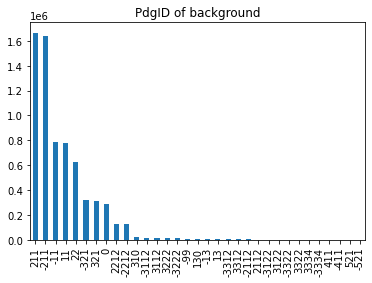

In [21]:
ax = bd["pdgId"].value_counts().plot(kind='bar',
                                    title = "PdgID of background")

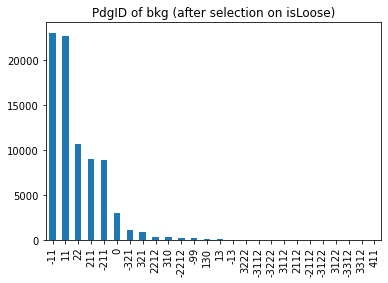

In [22]:
ax = bd_cut["pdgId"].value_counts().plot(kind='bar',
                                    title = "PdgID of bkg (after selection on isLoose)")

In [23]:
print("*Cut isLoose selection (bkg)*\n")
print("Total number of events (bkg): " + str(count_bd[0]))
print("Number of events after cut: " + str(count_bd[-1]))
print("Absolute efficiency: " + str(count_bd[-1] / count_bd[0]) )
print("Relative efficiency: " + str(count_bd[-1] / count_bd[-2]) )

*Cut isLoose selection (bkg)*

Total number of events (bkg): 6761866
Number of events after cut: 80287
Absolute efficiency: 0.011873497641035773
Relative efficiency: 0.011873497641035773


In [24]:
# cut from background positrons and electrons (+-11)

bd_cut = bd_cut[ bd_cut["pdgId"] != +11]
bd_cut = bd_cut[ bd_cut["pdgId"] != -11]
count_bd = np.append(count_bd, bd_cut.shape[0])

In [25]:
print("*Cut positrons and electrons (bkg)*\n")
print("Total number of events (bkg): " + str(count_bd[0]))
print("Number of events after cut: " + str(count_bd[-1]))
print("Absolute efficiency: " + str(count_bd[-1] / count_bd[0]) )
print("Relative efficiency: " + str(count_bd[-1] / count_bd[-2]) )

*Cut positrons and electrons (bkg)*

Total number of events (bkg): 6761866
Number of events after cut: 34527
Absolute efficiency: 0.005106134904181775
Relative efficiency: 0.43004471458642124


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


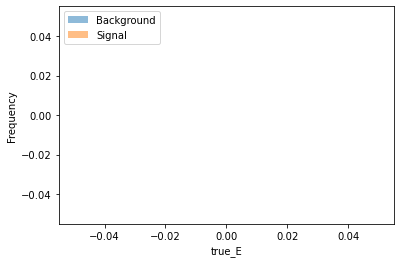

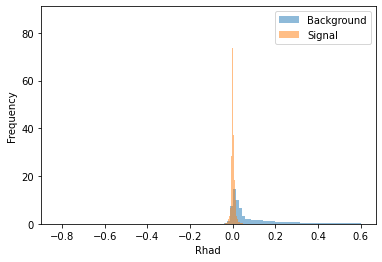

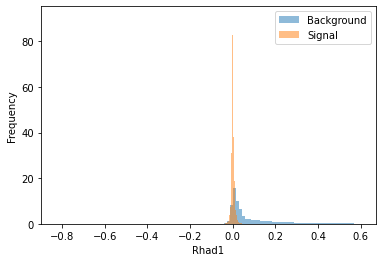

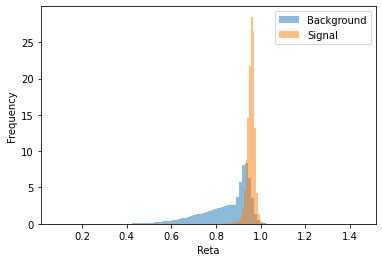

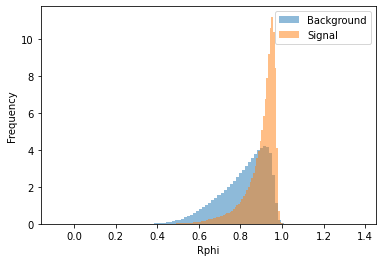

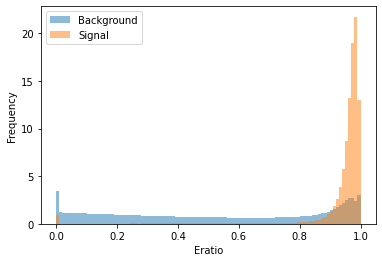

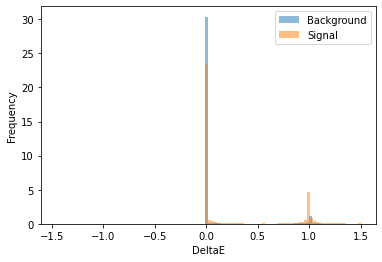

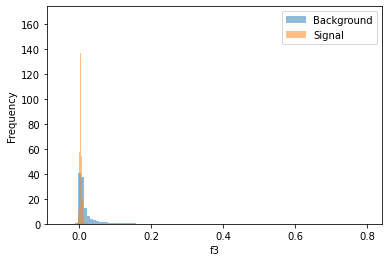

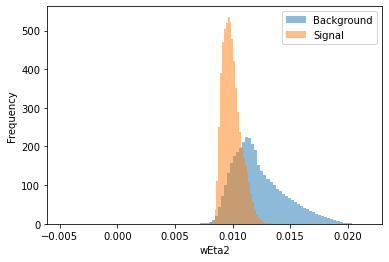

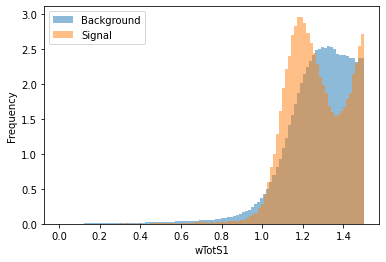

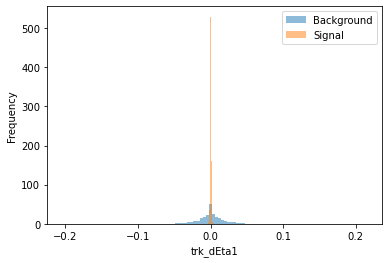

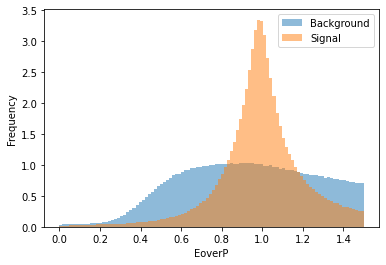

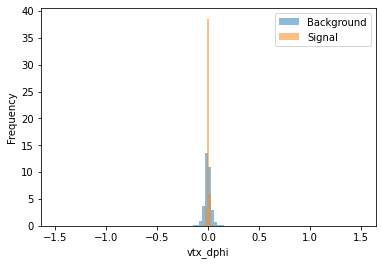

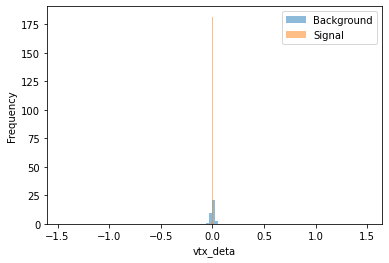

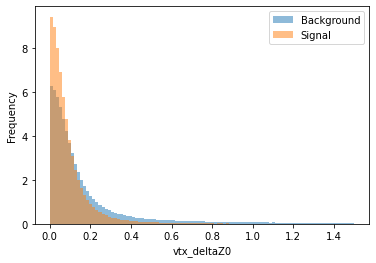

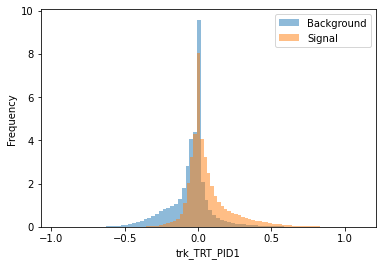

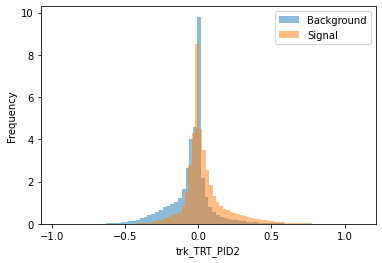

In [26]:
for vname in discriminating_variables:
    if (vname == "pt") | (vname == "eta"): continue
    
    if "Rhad" in vname:
        plt.figure()
        bd[ ((bd[vname])<.6)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Background' , legend='true')
        sd[ ((sd[vname])<.6)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Signal' , legend='true')
        plt.gca().set(xlabel=vname)
    
    elif "TRT_PID" in vname:
        plt.figure()
        bd[ (abs(bd[vname])<1.5)][vname].plot.hist(bins=80,alpha=0.5, density='true', label='Background' , legend='true')
        sd[ (abs(sd[vname])<1.5)][vname].plot.hist(bins=80,alpha=0.5, density='true', label='Signal' , legend='true')
        plt.gca().set(xlabel=vname)
    
    else: 
        plt.figure()
        bd[ (abs(bd[vname])<1.5)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Background' , legend='true')
        sd[ (abs(sd[vname])<1.5)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Signal' , legend='true')
        plt.gca().set(xlabel=vname)

Plot with selected bkg


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


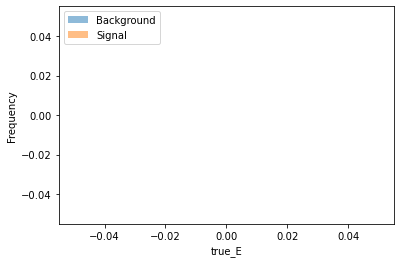

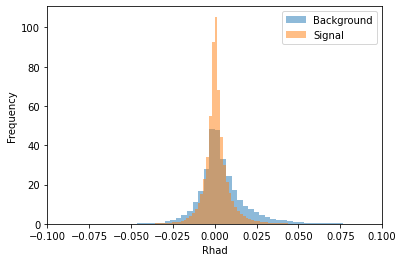

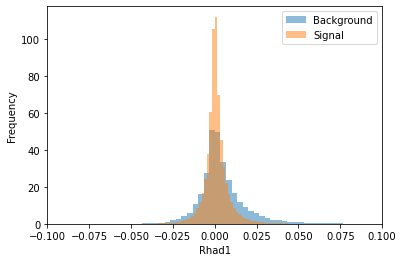

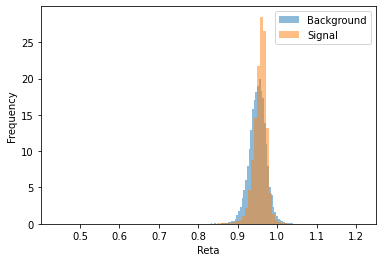

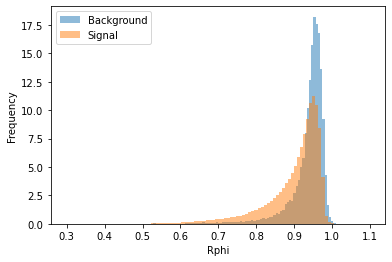

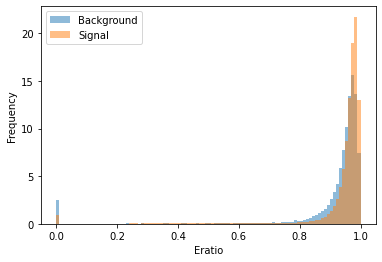

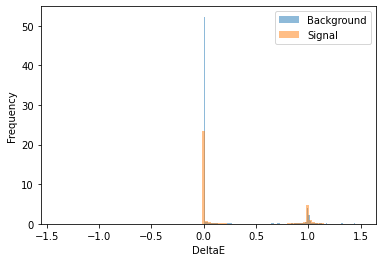

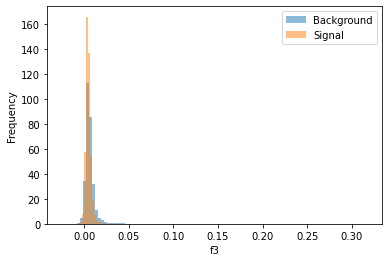

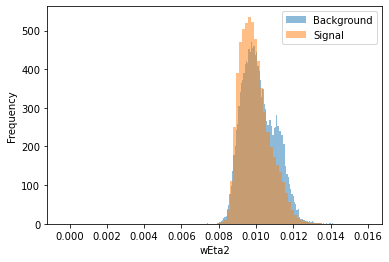

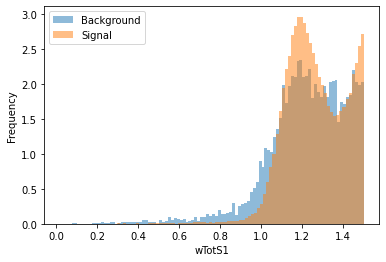

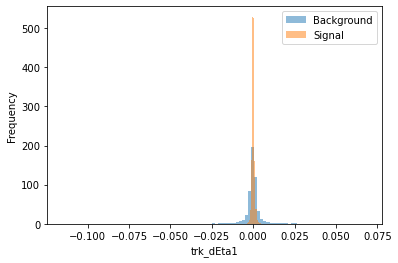

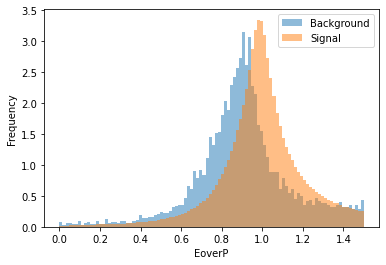

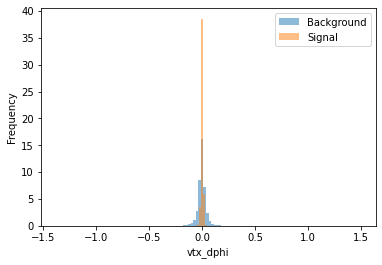

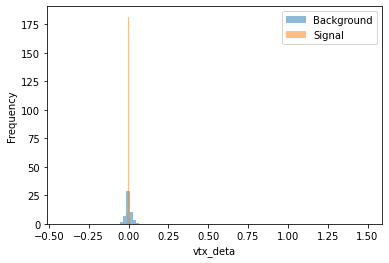

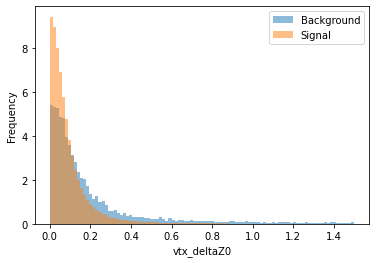

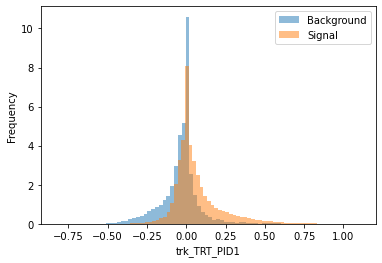

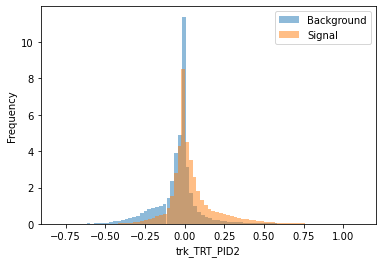

In [27]:
print("Plot with selected bkg")
for vname in discriminating_variables:
    if (vname == "pt") | (vname == "eta"): continue
    
    if "Rhad" in vname:
        plt.figure()
        bd_cut[vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true')
        sd[vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true')
        plt.gca().set(xlabel=vname)
        plt.xlim(-0.1, 0.1)
    
    elif "TRT_PID" in vname:
        plt.figure()
        bd_cut[ (abs(bd_cut[vname])<1.5)][vname].plot.hist(bins=80,alpha=0.5, density='true', label='Background' , legend='true')
        sd[ (abs(sd[vname])<1.5)][vname].plot.hist(bins=80,alpha=0.5, density='true', label='Signal' , legend='true')
        plt.gca().set(xlabel=vname)
    
    else: 
        plt.figure()
        bd_cut[ (abs(bd_cut[vname])<1.5)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Background' , legend='true')
        sd[ (abs(sd[vname])<1.5)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Signal' , legend='true')
        plt.gca().set(xlabel=vname)


(-0.05, 0.06)

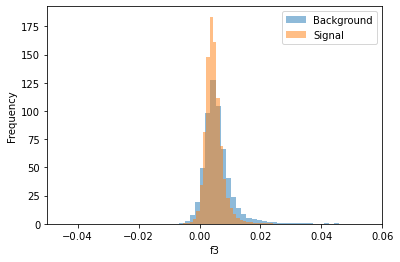

In [28]:
vname = "f3"
plt.figure()
bd_cut[vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true')
sd[vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true')
plt.gca().set(xlabel=vname)
plt.xlim(-0.05, 0.06)

(-0.05, 0.06)

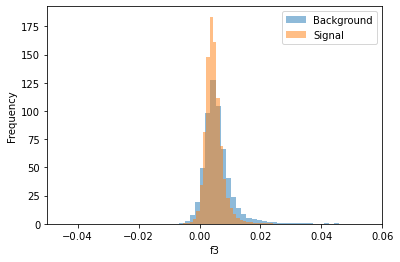

In [29]:
vname = "f3"
plt.figure()
bd_cut[vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true')
sd[vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true')
plt.gca().set(xlabel=vname)
plt.xlim(-0.05, 0.06)

In [30]:
# create a joint dataframe: totald

totald = pd.concat([sd, bd_cut], axis=0, ignore_index=True)
print("Total events:")
totald

Total events:


,eventNumber,pdgId,parentPdgId,isLoose,isTight,isIsoWithCorr_Loose,pt,eta,true_E,Rhad,...,EoverP,vtx_dphi,vtx_deta,vtx_deltaZ0,trk_TRT_PID1,trk_TRT_PID2,file_name_label,truth_label,version_label,jf_label
0,216028,11,11,1,0,1,69.194923,0.243375,69884.984375,-0.000153,...,1.181469,0.000508,0.003027,0.189831,-0.027880,-0.006519,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a,NaN
1,216005,-11,-11,1,0,1,59.034683,0.146982,66662.125000,-0.005290,...,0.993656,0.002240,-0.008324,0.101280,0.003245,0.103180,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a,NaN
2,216040,11,22,1,1,1,72.487686,0.485934,81926.343750,-0.000508,...,1.128548,-0.004982,-0.001126,0.028361,0.011771,0.005606,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a,NaN
3,216008,11,22,1,1,1,31.882032,0.403211,39761.117188,-0.001891,...,1.008108,-0.014281,0.001685,0.095896,-0.041915,-0.012443,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a,NaN
4,216017,11,22,1,1,1,63.155869,-0.323868,65556.718750,-0.000308,...,1.066187,-0.006264,-0.001361,0.078125,0.060672,-0.109327,mc23a.PhPy8EG_NNPDF23_A14_ggH125_yys_ME002.root,1.0,a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845954,222655678,-211,113,1,0,1,34.409515,-2.248464,-999.000000,-0.012502,...,3.769777,0.026743,-0.004160,0.466810,-0.000000,-0.000000,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
845955,230416853,22,22,1,0,1,51.500423,1.567433,-999.000000,-0.000768,...,23.621473,0.145580,-0.023926,10.566835,-0.158224,-0.198080,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
845956,233902459,-211,-421,1,0,0,40.405586,0.782743,-999.000000,0.011925,...,0.816554,-0.025729,0.003783,0.013111,-0.123990,-0.060378,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0
845957,246713775,22,111,1,0,1,32.449577,-0.714900,-999.000000,-0.002242,...,18.472908,-0.004053,0.048673,41.731293,0.029206,-0.054934,mc23e.Py8EG_A14NNPDF23LO_perf_JF35.root,0.0,e,35.0


In [71]:
# weight calculation sd / bd_cut (based on pt and eta)
# **global weights** based on the luminosity of different versions: a, d, e

# set "global" weights depending on statistics of every file

# 1. mc23a: 31.4 fb^(-1)
# 2. mc23d: 27.8 fb^(-1)
# 3. mc23e: 109.8 fb^(-1)

totald["weight_glob"] = pd.Series(dtype='float')

totald.loc[(totald["version_label"] == 'a', "weight_glob")] = 31.4
totald.loc[(totald["version_label"] == 'd', "weight_glob")] = 27.8
totald.loc[(totald["version_label"] == 'e', "weight_glob")] = 109.8


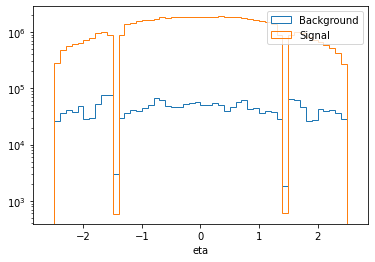

In [72]:
# **weight eta**
# fixed min and max
etamin = -2.6
etamax = 2.6
# etamin = totald["eta"].min()
# etamax = totald["eta"].max()
nbins_eta = 52
eta_bins = np.linspace(etamin, etamax, nbins_eta+1)

# histograms

h_eta_bkg = plt.hist( totald[ totald["truth_label"]==0 ]["eta"] ,
                     weights = totald[ totald["truth_label"]==0 ]["weight_glob"],
                     histtype='step', log = True, bins = eta_bins,
                     label='Background')

h_eta_sig = plt.hist( totald[ totald["truth_label"]==1 ]["eta"] ,
                     weights = totald[ totald["truth_label"]==1 ]["weight_glob"],
                     histtype='step', log = True, bins = eta_bins,
                     label='Signal')

plt.gca().set(xlabel="eta")
plt.legend(loc="upper right")

In [73]:
# weight_eta calclulation (ratio between bins)

eta_w = np.where(h_eta_bkg[0] == 1 , 1., h_eta_bkg[0] / h_eta_sig[0])
eta_w

/tmp/ipykernel_22677/4007295417.py:3: RuntimeWarning: invalid value encountered in true_divide
  eta_w = np.where(h_eta_bkg[0] == 1 , 1., h_eta_bkg[0] / h_eta_sig[0])


array([       nan, 0.09141946, 0.07916462, 0.07234464, 0.06344886,
       0.0739243 , 0.04015674, 0.03815133, 0.0559043 , 0.07531241,
       0.08609441, 5.20882852, 0.0328849 , 0.02666513, 0.02795346,
       0.02488731, 0.02694492, 0.03044754, 0.03913577, 0.03352982,
       0.0269273 , 0.02516289, 0.02571352, 0.02806037, 0.02861403,
       0.03166156, 0.02794034, 0.02710232, 0.02892271, 0.02669501,
       0.02163787, 0.02555627, 0.03129471, 0.03512529, 0.02567165,
       0.02702312, 0.02326239, 0.0267238 , 0.02692801, 0.03205445,
       2.98476005, 0.0736848 , 0.06215142, 0.04703172, 0.03259991,
       0.03726997, 0.06310178, 0.06760291, 0.07754997, 0.08529065,
       0.1019834 ,        nan])

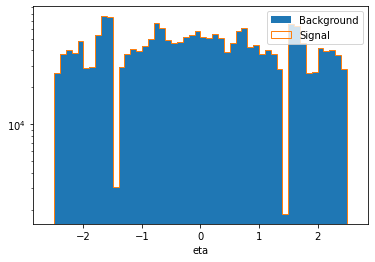

In [74]:
# calcultate for each (not only bkg!) event what bin it belongs to

bin_idx_bkg_eta = np.digitize(totald["eta"], eta_bins)
idx_bkg_eta = pd.Series(bin_idx_bkg_eta)
idx_bkg_eta

# map every bin to the corresponding weight

dfw_bkg_eta = idx_bkg_eta.map({i+1 : eta_w[i] for i in range(nbins_eta)})
dfw_bkg_eta

# attach weights to the dataframe, with condition on signal events

totald["weight_eta"] = dfw_bkg_eta.where( totald["truth_label"]==1 , 1.)
totald["weight_eta"]

# histograms
h_eta_bkg = plt.hist( totald[ totald["truth_label"]==0 ]["eta"] ,
                     weights = totald[ totald["truth_label"]==0 ]["weight_eta"] * totald[ totald["truth_label"]==0 ]["weight_glob"],
                     histtype='stepfilled', bins = eta_bins,
                     label='Background')


h_eta_sig = plt.hist( totald[ totald["truth_label"]==1 ]["eta"] ,
                     weights = totald[ totald["truth_label"]==1 ]["weight_eta"] * totald[ totald["truth_label"]==1 ]["weight_glob"],
                     histtype='step', log = True, bins = eta_bins,
                     label='Signal')

plt.gca().set(xlabel="eta")
plt.legend(loc="upper right")

In [75]:
# **weight pt**
# weights calculation with the these corrected bins

# try to create a binning of pt without empty bins
# solution: i create bin starting from quantiles

nbins_pt = 50
edge_var_pt = np.percentile(totald["pt"][ totald["truth_label"]==0 ], np.linspace(0, 100, nbins_pt + 1))
edge_var_pt

array([  20.00024414,   20.31944656,   20.64755493,   20.97622093,
         21.30948509,   21.67447662,   22.07830765,   22.49379158,
         22.94754364,   23.48436485,   23.97818832,   24.6153299 ,
         25.2672068 ,   26.02102119,   26.88541435,   27.82475929,
         28.75865952,   29.69132767,   30.67704964,   31.70501175,
         32.7671814 ,   33.77505814,   34.85944275,   36.02409286,
         37.28710358,   38.57801819,   39.86859436,   41.032453  ,
         42.22101639,   43.25033493,   44.38510132,   45.58514999,
         46.86504898,   48.25165421,   49.69254425,   51.12898407,
         52.6328801 ,   54.09592209,   55.82549545,   57.56459427,
         59.50650864,   61.87232056,   64.52690338,   67.56261749,
         71.2144519 ,   76.07522736,   82.89161774,   93.97904694,
        113.53537354,  156.85127686, 1213.39489746])

In [76]:
# correction on edges: add min and max of the total dataframe
epsilon = 0.1
edge_var_pt[0] = np.min(totald["pt"]) - epsilon
edge_var_pt[-1] = np.max(totald["pt"]) + epsilon
edge_var_pt

array([  19.90011826,   20.31944656,   20.64755493,   20.97622093,
         21.30948509,   21.67447662,   22.07830765,   22.49379158,
         22.94754364,   23.48436485,   23.97818832,   24.6153299 ,
         25.2672068 ,   26.02102119,   26.88541435,   27.82475929,
         28.75865952,   29.69132767,   30.67704964,   31.70501175,
         32.7671814 ,   33.77505814,   34.85944275,   36.02409286,
         37.28710358,   38.57801819,   39.86859436,   41.032453  ,
         42.22101639,   43.25033493,   44.38510132,   45.58514999,
         46.86504898,   48.25165421,   49.69254425,   51.12898407,
         52.6328801 ,   54.09592209,   55.82549545,   57.56459427,
         59.50650864,   61.87232056,   64.52690338,   67.56261749,
         71.2144519 ,   76.07522736,   82.89161774,   93.97904694,
        113.53537354,  156.85127686, 1534.01992187])

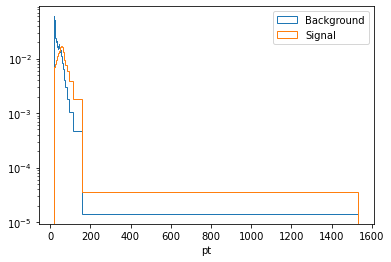

In [77]:
# histograms
# pt_bins ---> edge_var_pt

h_pt_bkg = plt.hist( totald[ totald["truth_label"]==0 ]["pt"], 
                        weights = totald[ totald["truth_label"] == 0]["weight_glob"],
                        histtype='step', log = True, bins = edge_var_pt, density='true',
                        label='Background')

h_pt_sig = plt.hist( totald[ totald["truth_label"]==1 ]["pt"] ,
                        weights = totald[ totald["truth_label"]==1 ]["weight_glob"],
                        histtype='step', log = True, bins = edge_var_pt, density='true',
                        label='Signal')

plt.gca().set(xlabel="pt")
plt.legend(loc="upper right")

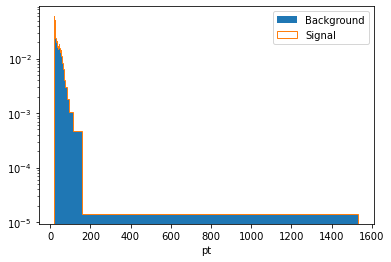

In [78]:
# weight calculation

pt_w = h_pt_bkg[0] / h_pt_sig[0]
pt_w

# calcultate for each (not only bkg!) event what bin it belongs to

bin_idx_bkg_pt = np.digitize(totald["pt"], edge_var_pt)
idx_bkg_pt = pd.Series(bin_idx_bkg_pt)
idx_bkg_pt

# map every bin to the corresponding weight

dfw_bkg_pt = idx_bkg_pt.map({i+1 : pt_w[i] for i in range(nbins_pt)})
dfw_bkg_pt

# attach weights to the dataframe, with condition on signal events

totald["weight_pt"] = dfw_bkg_pt.where( totald["truth_label"]==1 , 1.)
totald["weight_pt"]

# histograms with pt_w on bkg


h_pt_bkg = plt.hist( totald[ totald["truth_label"]==0 ]["pt"], 
                        weights = totald[ totald["truth_label"] == 0]["weight_glob"] * totald[ totald["truth_label"]==0 ]["weight_pt"],
                        histtype='stepfilled', log = True, bins = edge_var_pt, density='true',
                        label='Background')

h_pt_sig = plt.hist( totald[ totald["truth_label"]==1 ]["pt"] ,
                        weights = totald[ totald["truth_label"]==1 ]["weight_glob"] * totald[ totald["truth_label"]==1 ]["weight_pt"],
                        histtype='step', log = True, bins = edge_var_pt, density='true',
                        label='Signal')

plt.gca().set(xlabel="pt")
plt.legend(loc="upper right")

In [79]:
# test on correlation: **total weights**

totald["weight_tot"] = totald["weight_pt"] * totald["weight_eta"] * totald["weight_glob"]

Text(0.5, 1.0, 'Eta with total weights')

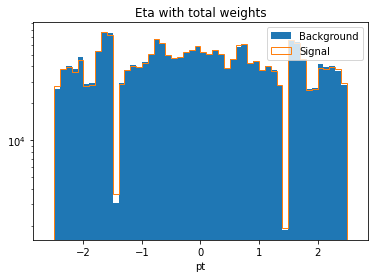

In [80]:
# final weighted eta plot

# histograms
h_eta_bkg = plt.hist( totald[ totald["truth_label"]==0 ]["eta"] ,
                     weights = totald[ totald["truth_label"]==0 ]["weight_tot"],
                     histtype='stepfilled', bins = eta_bins,
                     label='Background')


h_eta_sig = plt.hist( totald[ totald["truth_label"]==1 ]["eta"] ,
                     weights = totald[ totald["truth_label"]==1 ]["weight_tot"],
                     histtype='step', log = True, bins = eta_bins,
                     label='Signal')

plt.gca().set(xlabel="pt")
plt.legend(loc="upper right")
plt.title("Eta with total weights")

Text(0.5, 1.0, 'pt with total weights')

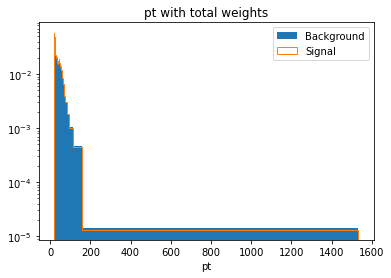

In [81]:
# final weighted pt plot


h_pt_bkg = plt.hist( totald[ totald["truth_label"]==0 ]["pt"], 
                        weights = totald[ totald["truth_label"] == 0]["weight_tot"],
                        histtype='stepfilled', log = True, bins = edge_var_pt, density='true',
                        label='Background')

h_pt_sig = plt.hist( totald[ totald["truth_label"]==1 ]["pt"] ,
                        weights = totald[ totald["truth_label"]==1 ]["weight_tot"],
                        histtype='step', log = True, bins = edge_var_pt, density='true',
                        label='Signal')

plt.gca().set(xlabel="pt")
plt.legend(loc="upper right")
plt.title("pt with total weights")

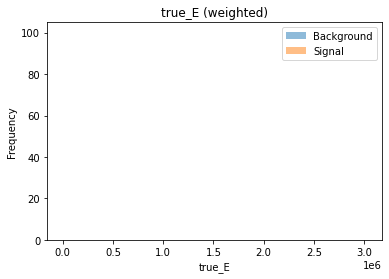

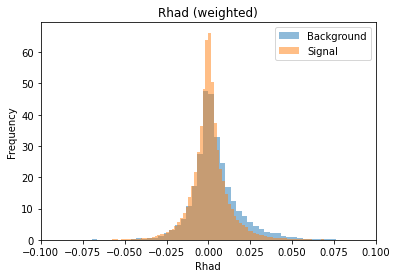

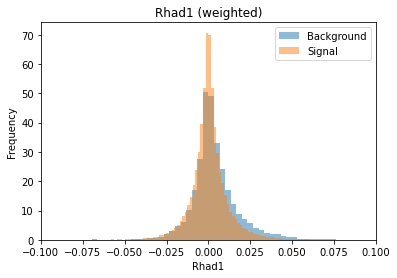

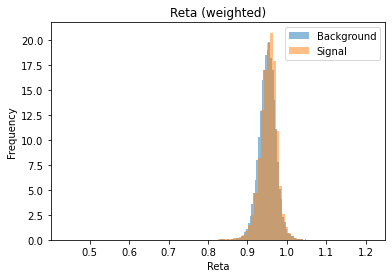

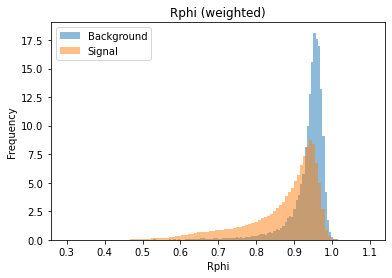

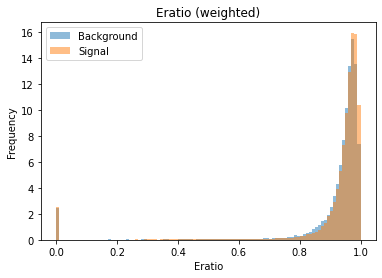

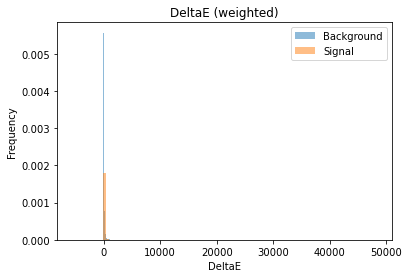

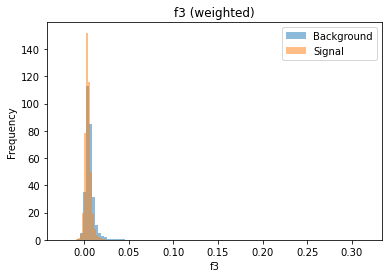

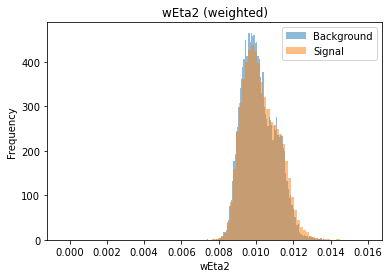

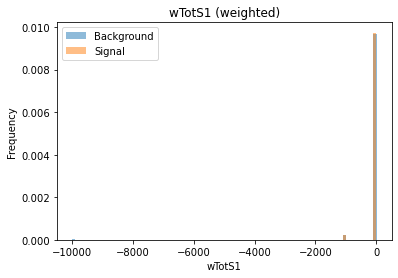

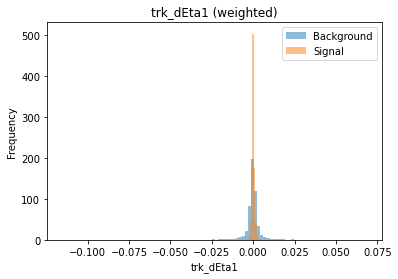

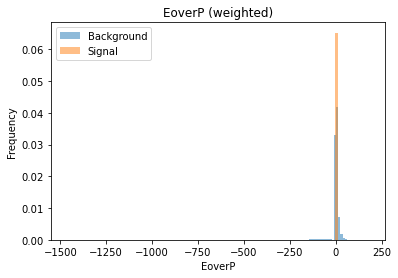

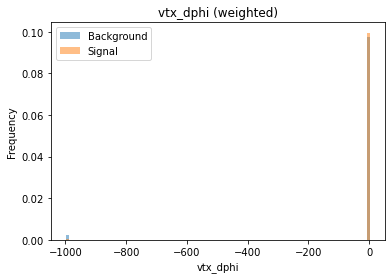

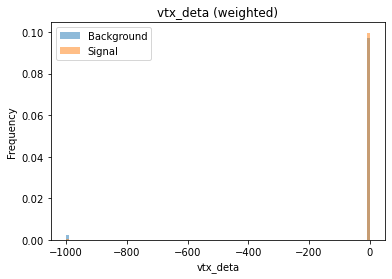

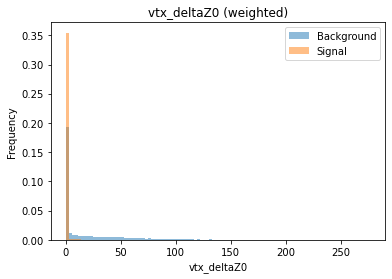

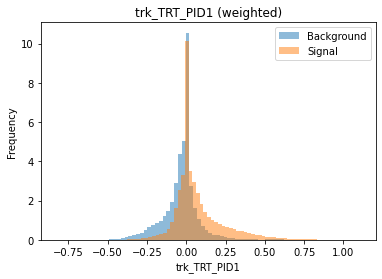

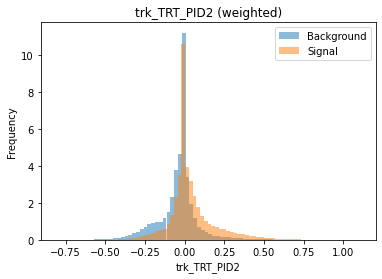

In [82]:
# **make more detailed plots on WEIGHTED variables**

for vname in discriminating_variables:
    if (vname == "pt") | (vname == "eta"): continue
    
    if "Rhad" in vname:
        plt.figure()
        totald[ (totald["truth_label"]==0)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ totald["truth_label"] == 0]["weight_tot"])
        totald[ (totald["truth_label"]==1)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ totald["truth_label"] == 1]["weight_tot"])
        plt.gca().set(xlabel=vname)
        plt.xlim(-0.1, 0.1)
        plt.title(vname + " (weighted)")
    
    elif "TRT_PID" in vname:
        plt.figure()
        totald[ (totald["truth_label"]==0)][vname].plot.hist(bins=80,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ totald["truth_label"] == 0]["weight_tot"])
        totald[ (totald["truth_label"]==1)][vname].plot.hist(bins=80,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ totald["truth_label"] == 1]["weight_tot"])
        plt.gca().set(xlabel=vname)
        plt.title(vname + " (weighted)")
    
    else: 
        plt.figure()
        totald[ (totald["truth_label"]==0)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ totald["truth_label"] == 0]["weight_tot"] )
        totald[ (totald["truth_label"]==1)][vname].plot.hist(bins=100,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ totald["truth_label"] == 1]["weight_tot"])
        plt.gca().set(xlabel=vname)
        plt.title(vname + " (weighted)")
        

Text(0.5, 1.0, 'DeltaE (weighted)')

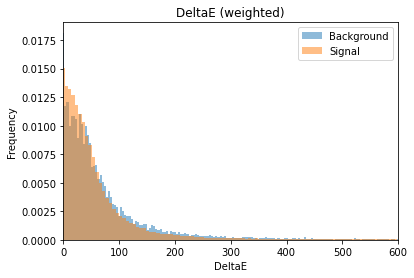

In [83]:
vname = "DeltaE"
E_lim = 1000
plt.figure()
totald[ (totald["truth_label"]==0) & (abs(totald[vname]) < E_lim)][vname].plot.hist(bins=300,alpha=0.5, density='true', label='Background' , legend='true',
                                                                                   weights = totald[ (totald["truth_label"]==0) & (abs(totald[vname]) < E_lim)]["weight_tot"])
totald[ (totald["truth_label"]==1) & (abs(totald[vname]) < E_lim)][vname].plot.hist(bins=300,alpha=0.5, density='true', label='Signal' , legend='true',
                                                                                   weights = totald[ (totald["truth_label"]==1) & (abs(totald[vname]) < E_lim)]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(0, 600)
plt.title(vname + " (weighted)")

In [84]:
totald["DeltaE"].max()

48247.89

Text(0.5, 1.0, 'f3 (weighted)')

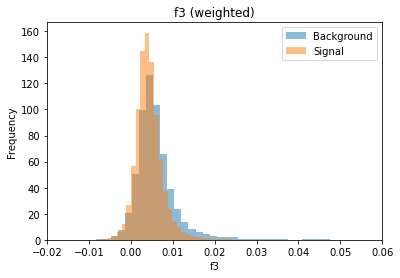

In [85]:
vname = "f3"
plt.figure()
totald[ (totald["truth_label"]==0)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ totald["truth_label"] == 0]["weight_tot"])
totald[ (totald["truth_label"]==1)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ totald["truth_label"] == 1]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(-0.02, 0.06)
plt.title(vname + " (weighted)")

Text(0.5, 1.0, 'wEta2 (weighted)')

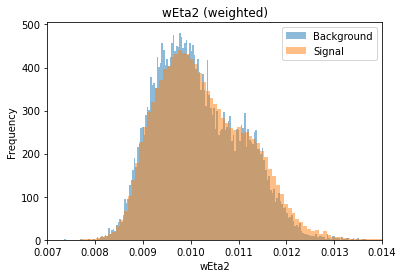

In [86]:
vname = "wEta2"
plt.figure()
totald[ (totald["truth_label"]==0)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ totald["truth_label"] == 0]["weight_tot"])
totald[ (totald["truth_label"]==1)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ totald["truth_label"] == 1]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(0.007, 0.014)
plt.title(vname + " (weighted)")

Text(0.5, 1.0, 'wTotS1 (weighted)')

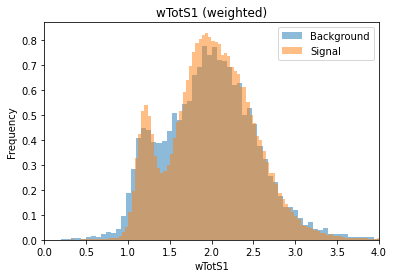

In [87]:
vname = "wTotS1"
E_min = -100
plt.figure()
totald[ (totald["truth_label"]==0) & (totald[vname] > E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ (totald["truth_label"] == 0) & (totald[vname] > E_min)]["weight_tot"])
totald[ (totald["truth_label"]==1) & (totald[vname] > E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ (totald["truth_label"] == 1) & (totald[vname] > E_min)]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(0, 4)
plt.title(vname + " (weighted)")

Text(0.5, 1.0, 'trk_dEta1 (weighted)')

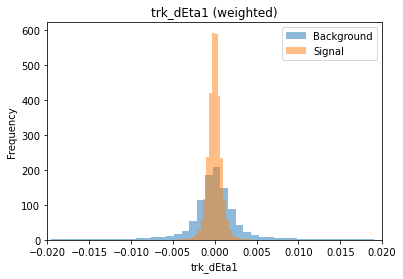

In [88]:
vname = "trk_dEta1"
plt.figure()
totald[ (totald["truth_label"]==0)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ totald["truth_label"] == 0]["weight_tot"])
totald[ (totald["truth_label"]==1)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ totald["truth_label"] == 1]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(-0.02, 0.02)
plt.title(vname + " (weighted)")

Text(0.5, 1.0, 'EoverP (weighted)')

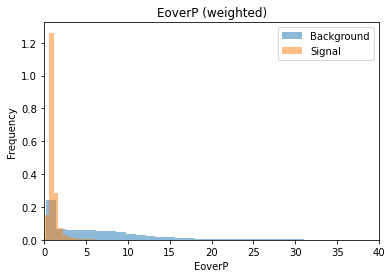

In [89]:
vname = "EoverP"
E_min = -50
plt.figure()
totald[ (totald["truth_label"]==0) & (totald[vname] > E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ (totald["truth_label"] == 0) & (totald[vname] > E_min)]["weight_tot"])
totald[ (totald["truth_label"]==1) & (totald[vname] > E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ (totald["truth_label"] == 1) & (totald[vname] > E_min)]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(0, 40)
plt.title(vname + " (weighted)")

Text(0.5, 1.0, 'vtx_dphi (weighted)')

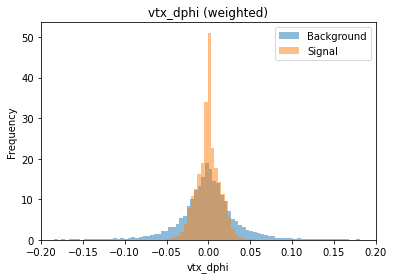

In [90]:
vname = "vtx_dphi"
E_min = 0.5
plt.figure()
totald[ (totald["truth_label"]==0) & (abs(totald[vname]) < E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ (totald["truth_label"] == 0) & (abs(totald[vname]) < E_min)]["weight_tot"])
totald[ (totald["truth_label"]==1) & (abs(totald[vname]) < E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ (totald["truth_label"] == 1) & (abs(totald[vname]) < E_min)]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(-0.2, 0.2)
plt.title(vname + " (weighted)")

Text(0.5, 1.0, 'vtx_deta (weighted)')

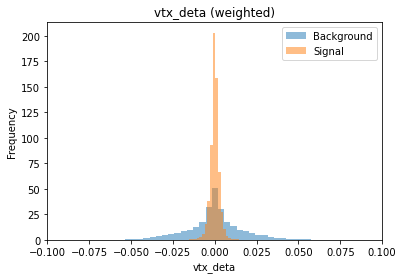

In [91]:
vname = "vtx_deta"
E_min = 0.5
plt.figure()
totald[ (totald["truth_label"]==0) & (abs(totald[vname]) < E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Background' , legend='true', weights = totald[ (totald["truth_label"] == 0) & (abs(totald[vname]) < E_min)]["weight_tot"])
totald[ (totald["truth_label"]==1) & (abs(totald[vname]) < E_min)][vname].plot.hist(bins=200,alpha=0.5, density='true', label='Signal' , legend='true', weights = totald[ (totald["truth_label"] == 1) & (abs(totald[vname]) < E_min)]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(-0.1, 0.1)
plt.title(vname + " (weighted)")

Text(0.5, 1.0, 'vtx_deltaZ0 (weighted)')

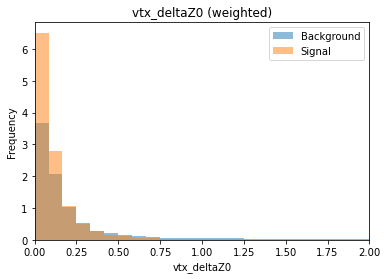

In [92]:
vname = "vtx_deltaZ0"
E_lim = 25
plt.figure()
totald[ (totald["truth_label"]==0) & (abs(totald[vname]) < E_lim)][vname].plot.hist(bins=300,alpha=0.5, density='true', label='Background' , legend='true',
                                                                                   weights = totald[ (totald["truth_label"]==0) & (abs(totald[vname]) < E_lim)]["weight_tot"])
totald[ (totald["truth_label"]==1) & (abs(totald[vname]) < E_lim)][vname].plot.hist(bins=300,alpha=0.5, density='true', label='Signal' , legend='true',
                                                                                   weights = totald[ (totald["truth_label"]==1) & (abs(totald[vname]) < E_lim)]["weight_tot"])
plt.gca().set(xlabel=vname)
plt.xlim(0, 2)
plt.title(vname + " (weighted)")

In [93]:
# prepare the input for the training. 
# I add the weight to the Y column to be able to access it after splitting
# in train and test

X = totald[discriminating_variables]
Y = totald[["truth_label", "weight_tot"]]

In [94]:
# split train and test using the scikit function

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [95]:
# save the weights in a dataframe

wdf_train = pd.DataFrame({"weight": y_train["weight_tot"]})
wdf_test  = pd.DataFrame({"weight": y_test["weight_tot"]})

# drop the weights and just keep the truth column

y_train = y_train.drop(["weight_tot"], axis=1)
y_test = y_test.drop(["weight_tot"], axis=1)

In [96]:
wdf_train

,weight
759553,2.619216
407661,1.614498
819393,27.800000
71967,6.744237
674417,5.183420
...,...
259178,2.817753
365838,2.913332
131932,0.272315
671155,0.833585


In [97]:
y_test

,truth_label
522798,1.0
221062,1.0
643314,1.0
742641,1.0
410103,1.0
...,...
373754,1.0
174030,1.0
612992,1.0
110285,1.0


In [98]:
# build a classifier, no hyperparameter optimisation for the moment and run the fit. 
# Eventually can use the weights here

model = lgb.LGBMClassifier(learning_rate=0.09,
                           num_leaves = 30,
                           max_depth=-5,
                           random_state=42 ,
                           objective='xentropy',
                           is_unbalance=True,
                           n_estimators=1000)

cb = [lgb.early_stopping(stopping_rounds=10),lgb.log_evaluation(30)]


In [99]:
model.fit(x_train,
          y_train,
          eval_set=[(x_test,y_test),(x_train,y_train)],
          eval_metric='xentropy', 
          sample_weight=wdf_train["weight"],
          eval_sample_weight=[wdf_test["weight"],
                              wdf_train["weight"]
                             ],
          #is_unbalance = True,
          callbacks=[lgb.early_stopping(stopping_rounds=20),lgb.log_evaluation(30)])

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 2918867.750000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 566792, number of used features: 19
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 1447534.250000
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.501561 -> initscore = 0.006245
[LightGBM] [Info] Start training from score 0.006245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(is_unbalance=True, learning_rate=0.09, max_depth=-5,
               n_estimators=1000, num_leaves=30, objective='xentropy',
               random_state=42)

In [100]:
# try with uniform weights

totald["weight1"] = 1.

In [101]:
# repeat the procedure with "weight1"

# prepare the input for the training. 
# I add the weight to the Y column to be able to access it after splitting
# in train and test

X = totald[discriminating_variables]
Y = totald[["truth_label", "weight1"]]

In [102]:
# split train and test using the scikit function

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

# save the weights in a dataframe

wdf_train = pd.DataFrame({"weight": y_train["weight1"]})
wdf_test  = pd.DataFrame({"weight": y_test["weight1"]})

# drop the weights and just keep the truth column

y_train = y_train.drop(["weight1"], axis=1)
y_test = y_test.drop(["weight1"], axis=1)

In [103]:
# build a classifier, no hyperparameter optimisation for the moment and run the fit. 
# Eventually can use the weights here

model = lgb.LGBMClassifier(learning_rate=0.09,
                           num_leaves = 30,
                           max_depth=-5,
                           random_state=42 ,
                           objective='xentropy',
                           is_unbalance=True,
                           n_estimators=1000)

cb = [lgb.early_stopping(stopping_rounds=10),lgb.log_evaluation(30)]

In [104]:
model.fit(x_train,
          y_train,
          eval_set=[(x_test,y_test),(x_train,y_train)],
          eval_metric='xentropy', 
          sample_weight=wdf_train["weight"],
          eval_sample_weight=[wdf_test["weight"],
                              wdf_train["weight"]
                             ],
          #is_unbalance = True,
          callbacks=[lgb.early_stopping(stopping_rounds=20),lgb.log_evaluation(30)])

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 566792.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 566792, number of used features: 19
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 279167.000000
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.959407 -> initscore = 3.162710
[LightGBM] [Info] Start training from score 3.162710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

LGBMClassifier(is_unbalance=True, learning_rate=0.09, max_depth=-5,
               n_estimators=1000, num_leaves=30, objective='xentropy',
               random_state=42)

In [105]:
wdf_train

,weight
759553,1.0
407661,1.0
819393,1.0
71967,1.0
674417,1.0
...,...
259178,1.0
365838,1.0
131932,1.0
671155,1.0
